In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Inplace updates the dataframe after droping the column

In [3]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### TotalCharges are in string for some reason. We need to convert it to float

In [4]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

#### Changing string to numeric and droping rows which has a " " 

In [5]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [6]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]
    
    

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


#### iloc is used for interger location

##### This is the space which is there in 11 rows.So, we need to drop those rows

In [7]:
df.iloc[488]['TotalCharges']

' '

In [8]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [9]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\aatur\AppData\Local\Temp\ipykernel_14976\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [11]:
df1.TotalCharges.dtypes

dtype('float64')

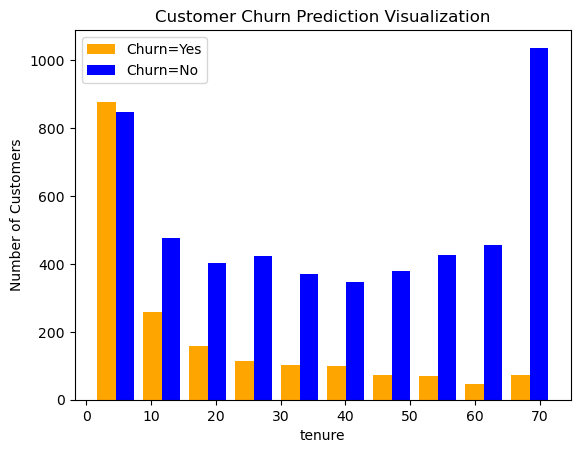

In [12]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure
plt.title('Customer Churn Prediction Visualization')
plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.hist([tenure_churn_yes,tenure_churn_no],color=['orange','blue'],label=['Churn=Yes','Churn=No'])
plt.legend()

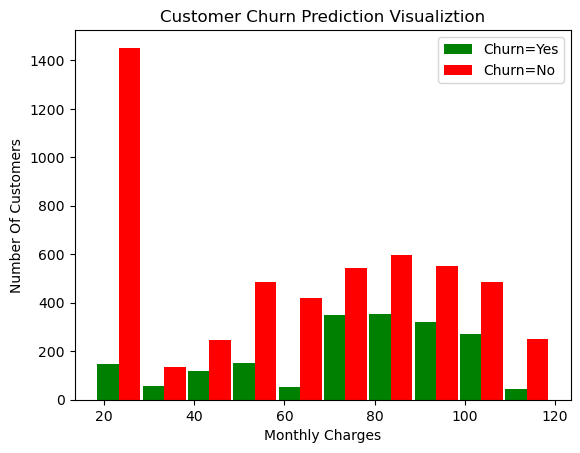

In [13]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

#### finding unique values in each column and also printing the columns which has dtype 'object'

In [14]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}:{df[column].unique()}')

In [15]:
    print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [16]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\aatur\AppData\Local\Temp\ipykernel_14976\2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\aatur\AppData\Local\Temp\ipykernel_14976\2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [17]:
     print_unique_col_values(df1)                                           

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


##### Replace yes and no with 1 and 0 because Machine Learning only understands 0 and 1. 

In [18]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)


C:\Users\aatur\AppData\Local\Temp\ipykernel_14976\2871735503.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [19]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [20]:
df1['gender'].replace({'Female': 1,'Male': 0},inplace=True)


C:\Users\aatur\AppData\Local\Temp\ipykernel_14976\983977002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female': 1,'Male': 0},inplace=True)


In [21]:
df1['gender'].unique()

array([1, 0], dtype=int64)

##### Appliying one hot encoding. It splits the column values to different sections and returns 1 or 0 based on the column attribute

###### It splits the InternetService column to 3 columns based on the attributes InternetService: ['DSL' 'Fiber optic' 'No']. So if any attribute is present in one row, it returns '1' that is True

In [22]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [23]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4386,0,0,1,1,55,1,0,1,1,0,...,True,False,False,False,False,True,True,False,False,False
615,1,0,0,0,15,1,1,0,0,0,...,True,False,False,True,False,False,False,False,False,True
248,0,0,0,0,1,1,0,1,0,0,...,True,False,False,True,False,False,False,False,False,True
4662,0,0,0,1,22,1,0,0,0,0,...,False,False,True,True,False,False,False,True,False,False
1586,1,0,1,1,68,1,1,1,0,1,...,False,True,False,False,False,True,True,False,False,False


In [24]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

#### Scaling for applying ANN

##### We use scaling to bring the values between 0 and 1 for applliying to ML or DL models

In [25]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [26]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6061,1,0,0,1,0.352113,1,1,0,0,0,...,True,False,False,True,False,False,False,False,False,True
3601,1,0,1,1,0.760563,1,0,0,0,0,...,False,False,True,True,False,False,False,True,False,False
3521,1,0,1,1,0.788732,1,0,1,1,0,...,True,False,False,False,True,False,False,False,True,False
4715,1,0,0,0,0.887324,1,1,1,1,1,...,True,False,False,False,False,True,False,True,False,False
866,0,0,1,0,0.859155,0,0,0,0,0,...,True,False,False,False,False,True,True,False,False,False


In [27]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [28]:
df2.replace({False: 0, True: 1}, inplace=True)

In [29]:
df2.columns.unique()

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [30]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

#### Applying ANN for the data

In [31]:
x=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [33]:
x_train.shape

(5625, 26)

In [34]:
x_test.shape

(1407, 26)

In [35]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [36]:
def ANN(x_train, y_train, x_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(x_train, y_train, epochs=100)
    else:
        model.fit(x_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(x_test, y_test))
    
    y_preds = model.predict(x_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [37]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)



Epoch 1/100


176/176 [==============================] - 1s 2ms/step - loss: 0.5311 - accuracy: 0.7284
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4298 - accuracy: 0.7940
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4206 - accuracy: 0.7991
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4164 - accuracy: 0.8030
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.8037
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.8043
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4106 - accuracy: 0.8066
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.8082
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4075 - accuracy: 0.8092
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4063 - ac

In [38]:
y_test.value_counts()

Churn
0    999
1    408
Name: count, dtype: int64

In [39]:
count_class_0,count_class_1 = df1.Churn.value_counts()
#divide by class
df_class_0 = df2[df2['Churn']==0]
df_class_1 = df2[df2['Churn']==1]

##### We can see the imbalance between both the classes


In [40]:
df_class_0.shape

(5163, 27)

In [41]:
df_class_1.shape

(1869, 27)

In [42]:
df_class_0.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4407,0,0,0,1,0.098592,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
653,1,0,0,0,0.225352,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1


###### Method -1: Undersampling

In [43]:
df_class_0_under = df_class_0.sample(count_class_1)

df_test_under = pd.concat([df_class_0_under,df_class_1],axis=0)

print('Random undersampling')
print(df_test_under.Churn.value_counts())




Random undersampling
Churn
0    1869
1    1869
Name: count, dtype: int64


In [44]:
x = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

In [45]:
from sklearn.model_selection import train_test_split
#'stratify' makes sure that both the samples are balanced (it will also have both classes in x_test,x_train so that different )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15, stratify=y)

In [46]:
y_train.value_counts()

Churn
0    1495
1    1495
Name: count, dtype: int64

In [47]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6366 - accuracy: 0.6438
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5266 - accuracy: 0.7408
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5032 - accuracy: 0.7565
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4957 - accuracy: 0.7585
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4911 - accuracy: 0.7645
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4875 - accuracy: 0.7629
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4862 - accuracy: 0.7679
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4837 - accuracy: 0.7662
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4819 - accuracy: 0.7679
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4811 - accuracy: 0.7656
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.4124 - accuracy: 0.8097
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4144 - accuracy: 0.8084
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4120 - accuracy: 0.8094
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4105 - accuracy: 0.8104
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.8120
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8120
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.8124
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.8120
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4077 - accuracy: 0.8124
Epoch 92/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4070 - accuracy: 0.8177
Epoch 93/100


###### Method 2 : Oversampling

In [48]:
count_class_0,count_class_1

(5163, 1869)

##### The code duplicates random samples of class 1 and makes sure both the class has the same value count

In [49]:
df_class_1_over = df_class_1.sample(count_class_0,replace=True)
df_test_over = pd.concat([df_class_0,df_class_1_over],axis=0)
print('Random Oversampliong')
print(df_test_over.Churn.value_counts())


Random Oversampliong
Churn
0    5163
1    5163
Name: count, dtype: int64


In [50]:
x = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15, stratify=y)

In [52]:
y_train.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

In [53]:
y_test.value_counts()

Churn
1    1033
0    1033
Name: count, dtype: int64

In [54]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5451 - accuracy: 0.7368
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4910 - accuracy: 0.7626
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4829 - accuracy: 0.7677
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4782 - accuracy: 0.7707
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4741 - accuracy: 0.7737
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4714 - accuracy: 0.7755
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4684 - accuracy: 0.7742
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4667 - accuracy: 0.7780
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4632 - accuracy: 0.7751
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4631 - accura

##### Method 3 : SMOTE

###### Smote method uses te data to create synthetic data using K nearest neighbours algorithm

In [55]:
x=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [56]:
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [60]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm,y_sm = smote.fit_resample(x,y)

y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [ ]:
#conda install -c conda-forge imbalanced-learn

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)


In [63]:
y_train.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

In [66]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5444 - accuracy: 0.7410
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4724 - accuracy: 0.7745
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4633 - accuracy: 0.7782
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4575 - accuracy: 0.7815
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4527 - accuracy: 0.7867
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4488 - accuracy: 0.7885
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4450 - accuracy: 0.7906
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4409 - accuracy: 0.7925
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4375 - accuracy: 0.7933
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4337 - accura

###### Method 4 : Use of Ensemble with undersampling

In [67]:
df2.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [68]:
x=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15, stratify=y)


In [71]:
y_train.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

In [73]:
4130/3


1376.6666666666667

In [74]:
df3 = x_train.copy()
df3['Churn']=y_train

In [78]:
df3_class0 = df3[df3.Churn == 0]
df3_class1 = df3[df3.Churn == 1]

In [86]:
y_train.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

In [87]:
#we are using a function here because we need to run 3 batches individually
def get_train_batch(df_majority, df_minority, start, end):
    #'majority' and 'minority' are classes 0 and 1. For each batch, we need to input the start and end values(ie the number of rows the model should take)
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    x_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return x_train, y_train    

###### Prediction of first batch

In [88]:
#here we have included the majority, minority, start and stop values
x_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.5941 - accuracy: 0.7030
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5224 - accuracy: 0.7515
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5037 - accuracy: 0.7542
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4934 - accuracy: 0.7632
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4884 - accuracy: 0.7642
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4841 - accuracy: 0.7702
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.7726
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4823 - accuracy: 0.7699
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4777 - accuracy: 0.7736
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4769 - accuracy: 0.7776
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.3992 - accuracy: 0.8171
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.8154
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3977 - accuracy: 0.8171
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3973 - accuracy: 0.8147
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3967 - accuracy: 0.8161
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3948 - accuracy: 0.8144
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3968 - accuracy: 0.8161
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3983 - accuracy: 0.8130
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3918 - accuracy: 0.8151
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3934 - accuracy: 0.8164
Epoch 93/100


###### Prediction of second batch

In [92]:
x_train, y_train = get_train_batch(df3_class0, df3_class1,1495,2990)

y_pred2= ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6357 - accuracy: 0.6599
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5229 - accuracy: 0.7559
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4936 - accuracy: 0.7615
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4874 - accuracy: 0.7652
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4833 - accuracy: 0.7599
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4813 - accuracy: 0.7669
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.7659
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4755 - accuracy: 0.7689
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4730 - accuracy: 0.7699
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4716 - accuracy: 0.7635
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.3889 - accuracy: 0.8191
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3885 - accuracy: 0.8204
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3902 - accuracy: 0.8161
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3875 - accuracy: 0.8164
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3866 - accuracy: 0.8204
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3859 - accuracy: 0.8217
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3840 - accuracy: 0.8174
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3836 - accuracy: 0.8214
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3832 - accuracy: 0.8231
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3820 - accuracy: 0.8224
Epoch 93/100


###### Prediction of third batch

In [93]:
x_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 0.5947 - accuracy: 0.7283
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5109 - accuracy: 0.7594
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4909 - accuracy: 0.7643
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4841 - accuracy: 0.7674
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4799 - accuracy: 0.7685
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4761 - accuracy: 0.7753
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4735 - accuracy: 0.7769
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4712 - accuracy: 0.7791
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4679 - accuracy: 0.7803
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4666 - accuracy: 0.7810
Epoch 11/

83/83 [==============================] - 0s 2ms/step - loss: 0.3779 - accuracy: 0.8334
Epoch 84/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3773 - accuracy: 0.8357
Epoch 85/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3786 - accuracy: 0.8353
Epoch 86/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3762 - accuracy: 0.8391
Epoch 87/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3784 - accuracy: 0.8326
Epoch 88/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3802 - accuracy: 0.8307
Epoch 89/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3754 - accuracy: 0.8307
Epoch 90/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3734 - accuracy: 0.8315
Epoch 91/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3735 - accuracy: 0.8364
Epoch 92/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3721 - accuracy: 0.8391
Epoch 93/100


##### Taking the majority vote of all the three predictions

###### The gneral idea of our ensemble method is when all 3 values are less than or equal 1 then the vote is 0. When all 3 values are greater than 1 then the vote is 1 

In [95]:
vote1=0
vote2=0
vote3=1
#here the voted value is 0
vote1+vote2+vote3

1

In [96]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [97]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1033
           1       0.49      0.77      0.60       374

    accuracy                           0.73      1407
   macro avg       0.69      0.74      0.70      1407
weighted avg       0.79      0.73      0.74      1407

